In [1]:
!pip install tensorflow matplot streamlit numpy pandas manim

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers


imported all the neccessary libraries here

In [3]:
data_train_path="Fruits_Vegetables/train"
data_test_path="Fruits_Vegetables/test"
data_val_path="Fruits_Vegetables/validation"


set the path of each train , test and validate folder

In [4]:
img_width=180
img_height=180

scaled the images to 180x180 to make it uniform 

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


validation set is false coz we dont have to split our dataset we already have a validation set 

In [6]:
data_cat=data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


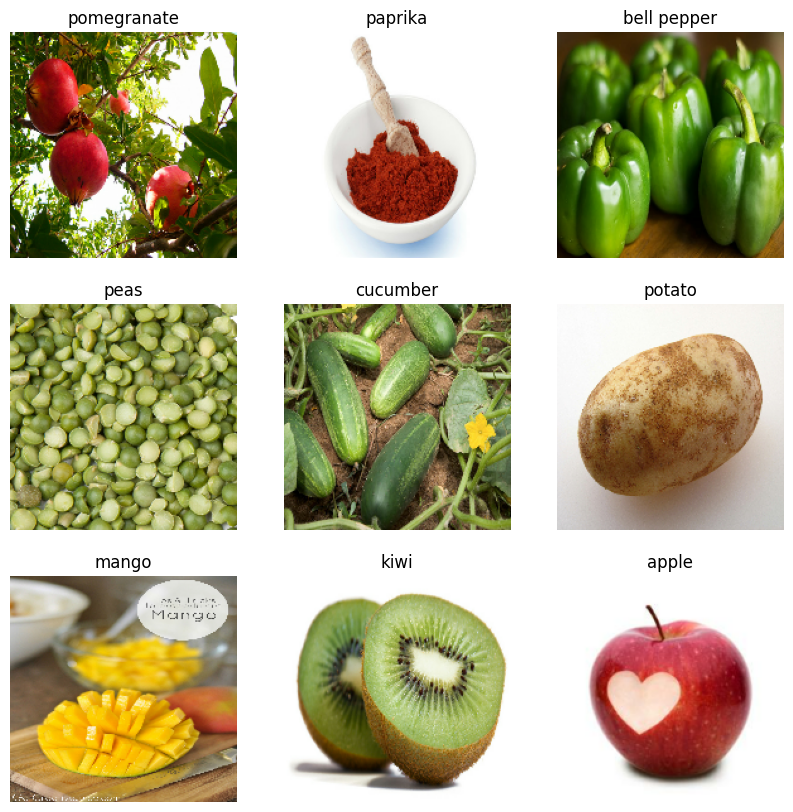

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

So here we see the images whicha are there 

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

180x180 is height of photo and 3 is for rgb

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 253ms/step - accuracy: 0.0645 - loss: 3.9654 - val_accuracy: 0.2849 - val_loss: 2.4037
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.2493 - loss: 2.6020 - val_accuracy: 0.5214 - val_loss: 1.7274
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.4447 - loss: 1.9907 - val_accuracy: 0.7464 - val_loss: 1.0111
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.5714 - loss: 1.5037 - val_accuracy: 0.8547 - val_loss: 0.6039
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.7414 - loss: 0.8823 - val_accuracy: 0.9145 - val_loss: 0.4682
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.8424 - loss: 0.5497 - val_accuracy: 0.9231 - val_loss: 0.4294
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.9256 - loss: 0.3058 - val_accuracy: 0.9288 - val_loss: 0.3822
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.9417 - loss: 0.2747 - val_accu

98 is number of batches 

Text(0.5, 1.0, 'Loss')

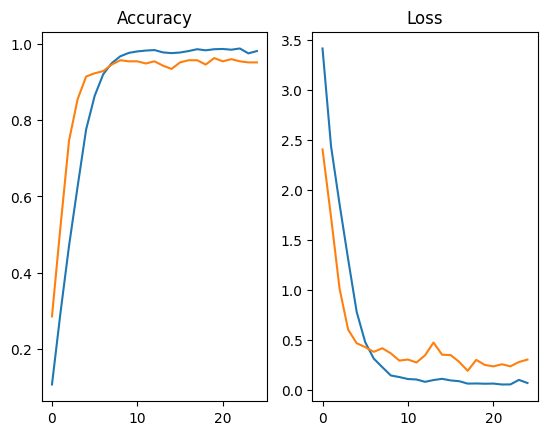

In [16]:
epochs_range=range(epochs_size)
plt.figure(figure=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

UsageError: Cell magic `%%manim` not found.


In [19]:
image="banana.jpg"
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [21]:
score=tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of{:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of99.65


In [21]:
model.save('imageclassification.keras')

In [18]:
import json

# Example: Saving history data to a JSON file
history_data = {
    "accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open('training_history.json', 'w') as f:
    json.dump(history_data, f)
